In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# f0 = pd.read_csv("data/special_metadata.csv")
# f1 = pd.read_csv("data/summon_metadata.csv").iloc[1:]
# f2 = pd.read_csv("data/summon_metadata2.csv").iloc[1:]

data = pd.read_csv("data/all_mons.csv")

# The "Image" key is the image file path

In [3]:
color_map = {
  # red
  "red": [204,0,0,255],
  # orange
  "orange": [204,102,0,255],
  # yellow
  "yellow": [204,204,0,255],
  # yellow-green
  "yellow-green": [102,204,0,255],
  # green
  "green": [0,204,0,255],
  # teal
  "teal": [0,204,204,255],
  # blue
  "blue": [0,102,204,255],
  # indigo
  "indigo": [0,0,204,255],
  # purple
  "purple": [102,0,204,255],
  # black
  "black": [0,0,0,255]
}

index_map = {
  0: "red",
  1: "orange",
  2: "yellow",
  3: "yellow-green",
  4: "green",
  5: "teal",
  6: "blue",
  7: "indigo",
  8: "purple",
  9: "black"
}

def get_name(color):
  for i in color_map.items():
    if np.equal(color, i[1]).all():
      return i[0]

def get_box(img):
    height = img.shape[0]
    width = img.shape[1]
    top = None
    bot = None
    left = None
    right = None
    for i in range(height):
        for j in range(width):
            if (np.sum(img[i][j][0:3]) != 0) and (top == None):
                top = i         
    for i in reversed(range(height)):
        for j in range(width):
            if (np.sum(img[i][j][0:3]) != 0) and (bot == None):
                bot = i+1     
    for i in range(width):
        for j in range(height):
            if (np.sum(img[j][i][0:3]) != 0) and (left == None):
                left = i        
    for i in reversed(range(width)):
        for j in range(height):
            if (np.sum(img[j][i][0:3]) != 0) and (right == None):
                right = i+1
    return (top, bot, left, right)

def nearest_color(color):
  if np.equal(color, [0,0,0,255]).all():
    return [0,0,0, 255]
  closest_color = [204,0,0,255]
  diff = 1000000000
  for c in color_map.values():
    curr_diff = np.linalg.norm(np.array(c) - color)
    if curr_diff < diff:
      diff = curr_diff
      closest_color = c
  return closest_color

def clean_img(img):
  top,bot,left,right = get_box(img)
  new_img = []
  color_counts = {}
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      c = nearest_color(img[i][j])
      new_img.append(c)
  new_img = np.array(new_img).reshape(128,128,4)
  cropped_img = new_img[top:bot, left:right]
  return cropped_img

def get_color_count(img):
  counts = {
  "red": 0,
  "orange": 0,
  "yellow": 0,
  "yellow-green": 0,
  "green": 0,
  "teal": 0,
  "blue": 0,
  "indigo": 0,
  "purple": 0,
  "black": 0
  }
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      name = get_name(img[i][j])
      counts[name] += 1
  return counts

def color_square(colors):
  height = 0
  color_img = np.ones((1000, 1000, 4))
  for i in range(len(colors)):
    height_delta = height+int(1000*colors[i])
    color_img[height:height_delta] = np.array(color_map[index_map[i]])/255
    height = height_delta
  return color_img

In [7]:
test_img = mpimg.imread(data.iloc[0]["Image"])
test_img_2 = clean_img(test_img)

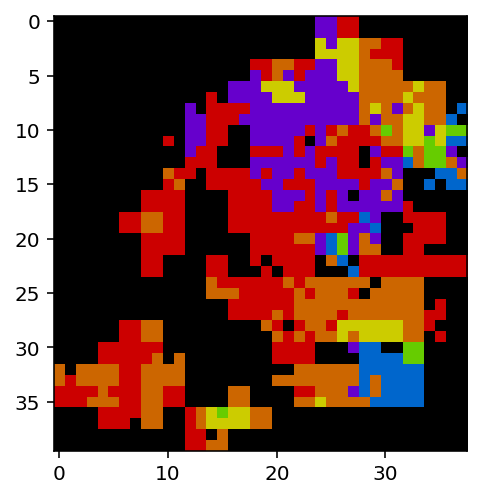

In [8]:
plt.imshow(test_img_2)

In [ ]:
list(get_color_count(test_img_2).values())

In [19]:
# color_profiles = []
# for i, r in data.iterrows():
#   mon_img = mpimg.imread(data.iloc[i]["Image"])
#   mon_img_cleaned = clean_img(mon_img)
#   color_profiles.append(list(get_color_count(mon_img_cleaned).values()))
# print(len(color_profiles))

341


In [53]:
colors = []
for c in data["colors"]:
  colors.append(np.array(c[1:-2].split(","), dtype=int))
colors = np.array(colors)

In [67]:
solid_colors = colors[:, 0:-1]
solid_colors_sum = np.sum(colors[:, 0:-1], axis=1)
solid_colors_norm = np.ones(solid_colors.shape)
for i in range(341):
  solid_colors_norm[i] = solid_colors[i]/solid_colors_sum[i]

In [4]:
def show_bar(i):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  colors = list(color_map.keys())[0:-1]
  amounts = solid_colors_norm[i]
  ax.bar(colors,amounts, color = [np.array(a)/255 for a in color_map.values()])
  plt.show()

def show_all_images(i):
  img = mpimg.imread(data.iloc[i]["Image"])
  cleaned_img = clean_img(img)
  plt.imshow(img)
  plt.show()
  plt.imshow(cleaned_img)
  plt.show()
  plt.imshow(color_square(solid_colors_norm[i]))
  plt.show()
  show_bar(i)

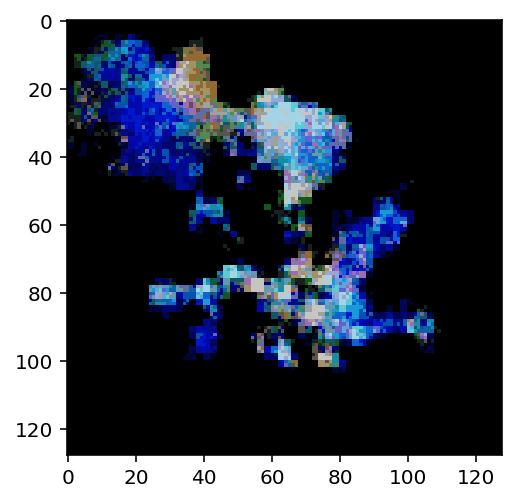

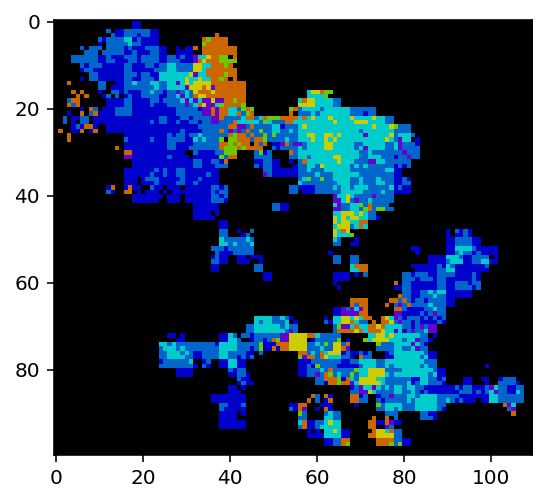

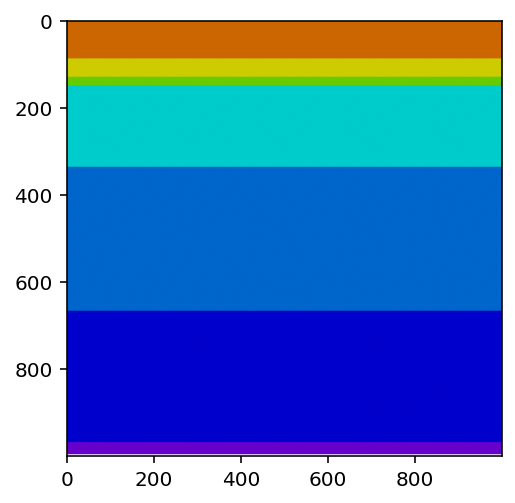

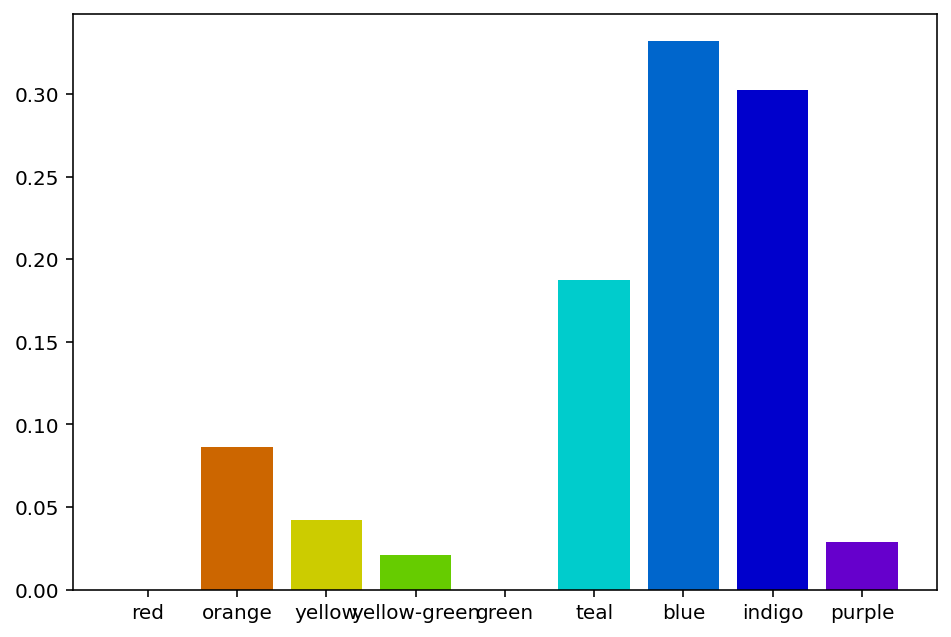

In [119]:
show_all_images(21)

In [162]:
i = 0

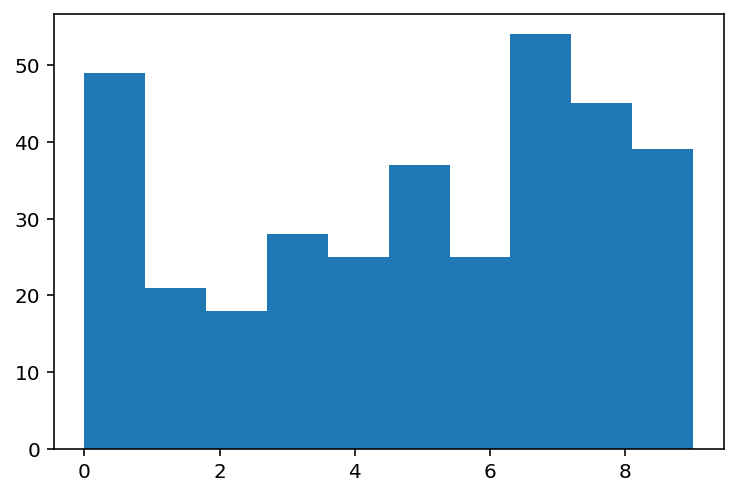

56


In [218]:
i += 1
kmeans = KMeans(n_clusters=10, random_state=i).fit(solid_colors_norm)
plt.hist(kmeans.labels_)
plt.show()
print(i)

# 12 clusters and seed = 17 is pretty good 
# 10 clusters and seed = 29 is pretty good
# 10 and 45 is pretty good
# 10 and 56 is pretty good